In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy import stats

In [30]:
df_eda = pd.read_csv("dffinal.csv")
df_eda.head(2)

,make,model,version,fuel,year,kms,power,shift,price,location,publish_date,dealer_address,dealer_zip_code,lat,long,state,Car and Model,precio_categorias,kms_categoria,years_old
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,Pineda de Mar,2023-02-04,"2, Carrer de Jacint Benavente, Poblenou, Pined...",8397.0,41.627681,2.689871,Catalunya,Opel Crossland,Alto,Muy Poco,3
1,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,Coslada,2023-01-20,"Avenida de José Gárate, Coslada, Área metropol...",28823.0,40.423802,-3.555288,Comunidad de Madrid,Opel Crossland,Moderado,Moderado,3


In [31]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39100 entries, 0 to 39099
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               39100 non-null  object 
 1   model              39100 non-null  object 
 2   version            39100 non-null  object 
 3   fuel               39100 non-null  object 
 4   year               39100 non-null  int64  
 5   kms                39100 non-null  float64
 6   power              39100 non-null  float64
 7   shift              39100 non-null  object 
 8   price              39100 non-null  int64  
 9   location           39100 non-null  object 
 10  publish_date       39100 non-null  object 
 11  dealer_address     39100 non-null  object 
 12  dealer_zip_code    39100 non-null  float64
 13  lat                39100 non-null  float64
 14  long               39100 non-null  float64
 15  state              39100 non-null  object 
 16  Car and Model      391

In [41]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
year,39100.0,2016.642123,4.016766,1967.000000,2015.000000,2018.000000,2019.000000,2.023000e+03
kms,39100.0,86404.150921,57086.463374,0.000000,43000.000000,79744.000000,117852.000000,1.330000e+06
power,39100.0,153.396803,1824.374847,0.000000,102.000000,128.000000,150.000000,3.605710e+05
price,39100.0,19850.507110,15924.478766,501.000000,12450.000000,16490.000000,22989.000000,4.490000e+05
dealer_zip_code,39100.0,24272.680051,14875.486702,1002.000000,8734.000000,28100.000000,36211.000000,5.082000e+04
lat,39100.0,39.840565,2.010821,28.047874,37.992379,40.282476,41.413809,4.356887e+01
long,39100.0,-2.443900,3.106442,-16.622750,-4.081294,-2.935004,-0.376335,3.238264e+00
years_old,39100.0,8.357877,4.016766,2.000000,6.000000,7.000000,10.000000,5.800000e+01


In [32]:
def calcular_cardinalidad(df):
    for columna in df.columns:
        print(f"Cardinalidad de {columna}: {df[columna].nunique()/len(df) * 100}")

In [33]:
calcular_cardinalidad(df_eda)

Cardinalidad de make: 0.16624040920716113
Cardinalidad de model: 1.8874680306905371
Cardinalidad de version: 20.98976982097187
Cardinalidad de fuel: 0.010230179028132993
Cardinalidad de year: 0.10997442455242966
Cardinalidad de kms: 16.613810741687978
Cardinalidad de power: 0.8951406649616368
Cardinalidad de shift: 0.005115089514066497
Cardinalidad de price: 5.959079283887468
Cardinalidad de location: 1.6138107416879797
Cardinalidad de publish_date: 1.040920716112532
Cardinalidad de dealer_address: 4.10230179028133
Cardinalidad de dealer_zip_code: 2.163682864450128
Cardinalidad de lat: 1.6547314578005117
Cardinalidad de long: 1.659846547314578
Cardinalidad de state: 0.04092071611253197
Cardinalidad de Car and Model: 1.9232736572890023
Cardinalidad de precio_categorias: 0.012787723785166238
Cardinalidad de kms_categoria: 0.015345268542199487
Cardinalidad de years_old: 0.10997442455242966


| Columna/Variable       | Descripción                          | Tipo de Variable       | Importancia Inicial | Nota                       |
|-------------------------|--------------------------------------|-----------------------|---------------------|----------------------------|
| make                   | Marca del coche (ej. Opel, Citroën)  | Categórica Nominal          | 0                | Clave para hipótesis 2     |
| model                  | Modelo del coche (ej. Corsa, C3)     | Categórica Nominal           | 2               |      |
| version                | Versión específica del modelo        | Categórica Nominal            | 3                |  |
| year                   | Año de fabricación                   | Numérica Discreta     | 1                | Influye en precio y edad   |
| kms                    | Kilometraje del coche                | Numérica Continua   | 1                | Clave para durabilidad y precio     |
| power                  | Potencia en CV                       | Numérica Continua    | Media               | Puede afectar precio       |
| shift                  | Tipo de transmisión (manual, automático) | Categórica Nominal       | 1                | Clave para hipótesis 3     |
| price                  | Precio del coche                     | Numérica Continua    | 0            | Variable objetivo          |
| location               | Ubicación del coche (ciudad/provincia) | Categórica Nominal       | 2               |      |
| publish_date           | Fecha de publicación del anuncio     | Fecha                | 3                | |
| dealer_zip_code        | Código postal del vendedor           | Numérica Discreta     | 3                |  |
| long                   | Longitud geográfica                  | Numérica Continua    | 3                |     |
| state                  | Estado o región del coche            | Categórica Nominal            | 1               | Clave para hipótesis 4     |
| precio_categorias   | Categoría precisa del coche (SUV, etc.) | Categórica Ordinal      | 1               | Segmentación de precios     |
| kms_categorias         | Categorías de kilometraje            | Categórica Ordinal         | 1               | Segmentación de kms            |
| years_old              | Edad del coche                       | Numérica Discreta     | 1                |  |

In [34]:
df_numericas = df_eda[["kms","year","power","price"]]
df_numericas

,kms,year,power,price
0,5.0,2022,110.0,22900
1,24847.0,2022,110.0,19990
2,41356.0,2021,120.0,18590
3,11.0,2022,110.0,22700
4,11.0,2022,110.0,22700
...,...,...,...,...
39095,148527.0,2015,150.0,13310
39096,148527.0,2015,150.0,13310
39097,148527.0,2015,150.0,13310
39098,173035.0,2013,111.0,9290


# Vamos a empezar a hacer un análisis univariante de las columnas de nuestro Dataset
Empezamos con las columnas categóricas

In [35]:
variables_categoricas = ["make","fuel","shift","state","precio_categorias","kms_categoria"]
variables_numericas = ["year","kms","power","price"]

In [36]:
def analisis_uni_categoricas(df,var_categorica):
    print(f"Análisis univariante de {var_categorica}")
    fig,ax = plt.subplots(3,1,figsize=(20,15))
    sns.countplot(x=var_categorica,data=df_eda,ax=ax[0],hue=var_categorica)
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=60)
    ax[0].set_title(f"Frecuencia absoluta de {var_categorica}")
    ax[0].set_xlabel("")

    valores_absolutos = df_eda[var_categorica].value_counts()
    valores_relativos = df_eda[var_categorica].value_counts(normalize=True) * 100

    sns.barplot(x=valores_relativos.index,y=valores_relativos.values,hue=valores_relativos.index,ax=ax[1])
    ax[1].set_title(f"Frecuencia relativa de {var_categorica}")
    ax[1].set_xlabel("")
    ax[1].tick_params(axis="x",rotation=60)

    cantidad = len(df[var_categorica].unique()) < 8


    if cantidad:
        ax[2].pie(x=valores_absolutos.values,labels=valores_absolutos.index,autopct="%.2f%%",startangle=90)
        ax[2].set_title(f"Proporciones de {var_categorica}")
    
    if not cantidad:
        ax[2].set_visible(False)

    fig.subplots_adjust(hspace=0.5)

    plt.tight_layout();

C:\Users\David\AppData\Local\Temp\ipykernel_23432\3524888600.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



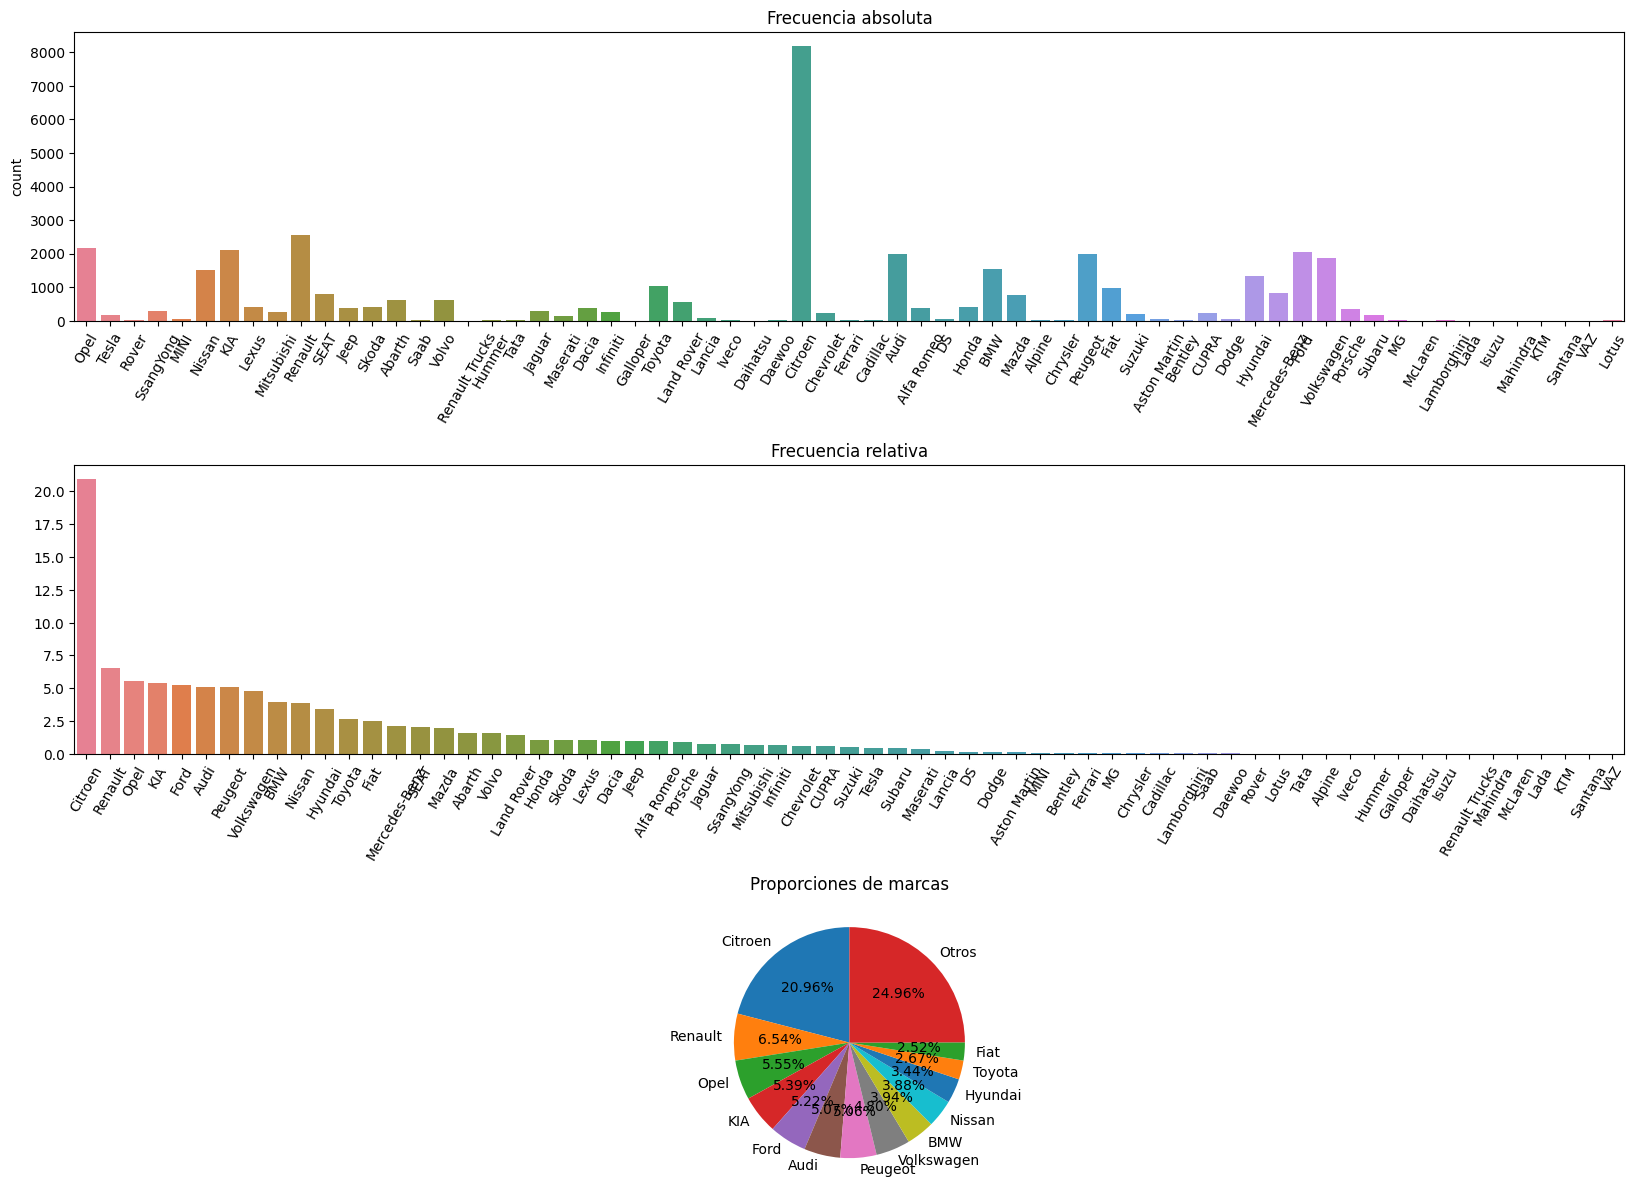

In [37]:
fig,ax = plt.subplots(3,1,figsize=(20,15))
sns.countplot(x="make",data=df_eda,ax=ax[0],hue="make")
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=60)
ax[0].set_title("Frecuencia absoluta")
ax[0].set_xlabel("")

valores_absolutos = df_eda["make"].value_counts()
valores_relativos = df_eda["make"].value_counts(normalize=True) * 100

sns.barplot(x=valores_relativos.index,y=valores_relativos.values,hue=valores_relativos.index,ax=ax[1])
ax[1].set_title("Frecuencia relativa")
ax[1].set_xlabel("")
ax[1].tick_params(axis="x",rotation=60)

valores_absolutos["Otros"] = valores_absolutos.loc[valores_absolutos<900].sum()
valores_absolutos_tarta = valores_absolutos.loc[valores_absolutos > 900].copy()
ax[2].pie(x=valores_absolutos_tarta.values,labels=valores_absolutos_tarta.index,autopct="%.2f%%",startangle=90)
ax[2].set_title("Proporciones de marcas")

fig.subplots_adjust(hspace=0.5)

El conjunto de datos muestra una distribución muy desigual de marcas, donde Citroën destaca como la más frecuente, seguida a distancia por Renault, Opel, KIA, Ford y Audi. La mayoría de marcas tienen una presencia muy baja, lo que se refleja en el alto porcentaje del grupo "Otros" en el gráfico circular (24.96%). En resumen, unas pocas marcas concentran la mayoría de los registros, mientras que el resto tienen una representación residual.

Análisis univariante de make


C:\Users\David\AppData\Local\Temp\ipykernel_23432\2510462693.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Análisis univariante de fuel


C:\Users\David\AppData\Local\Temp\ipykernel_23432\2510462693.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\David\AppData\Local\Temp\ipykernel_23432\2510462693.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Análisis univariante de shift
Análisis univariante de state


C:\Users\David\AppData\Local\Temp\ipykernel_23432\2510462693.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Análisis univariante de precio_categorias


C:\Users\David\AppData\Local\Temp\ipykernel_23432\2510462693.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Análisis univariante de kms_categoria


C:\Users\David\AppData\Local\Temp\ipykernel_23432\2510462693.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



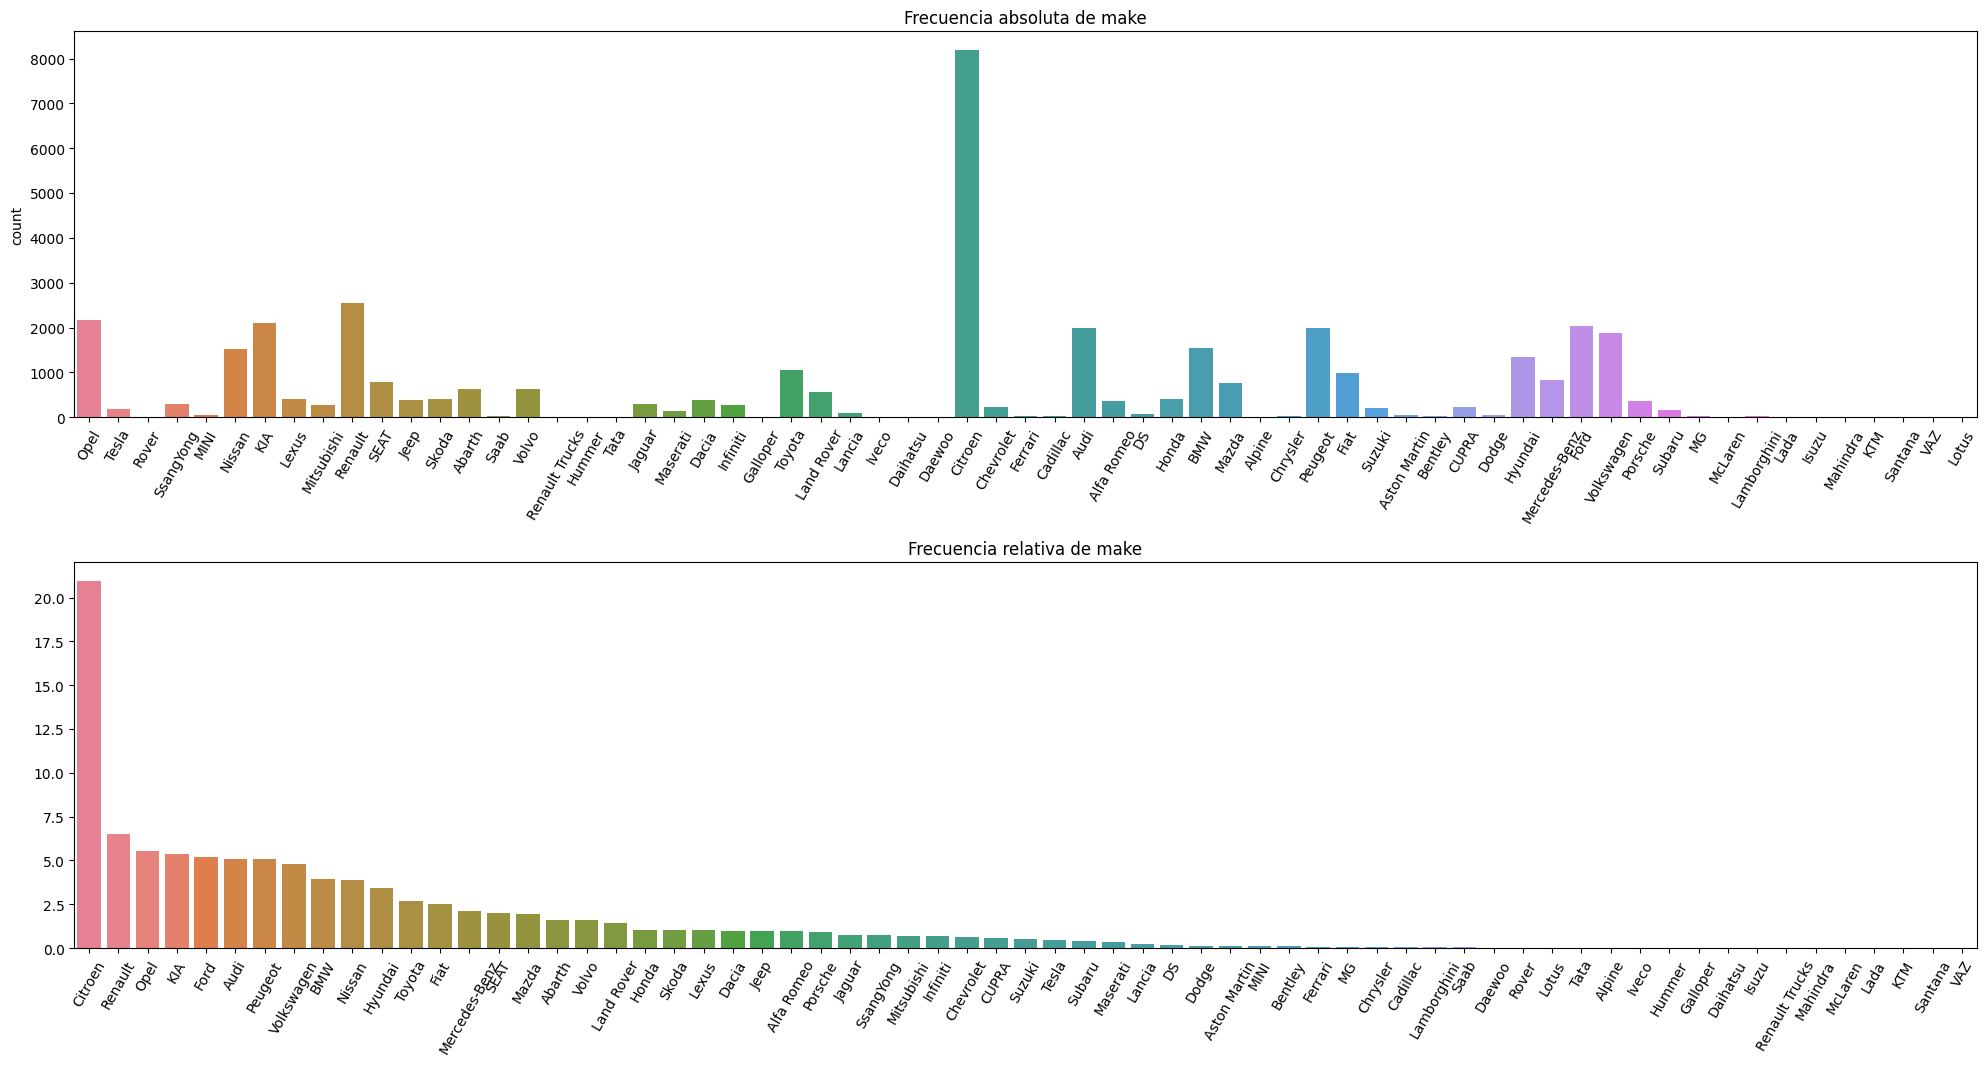

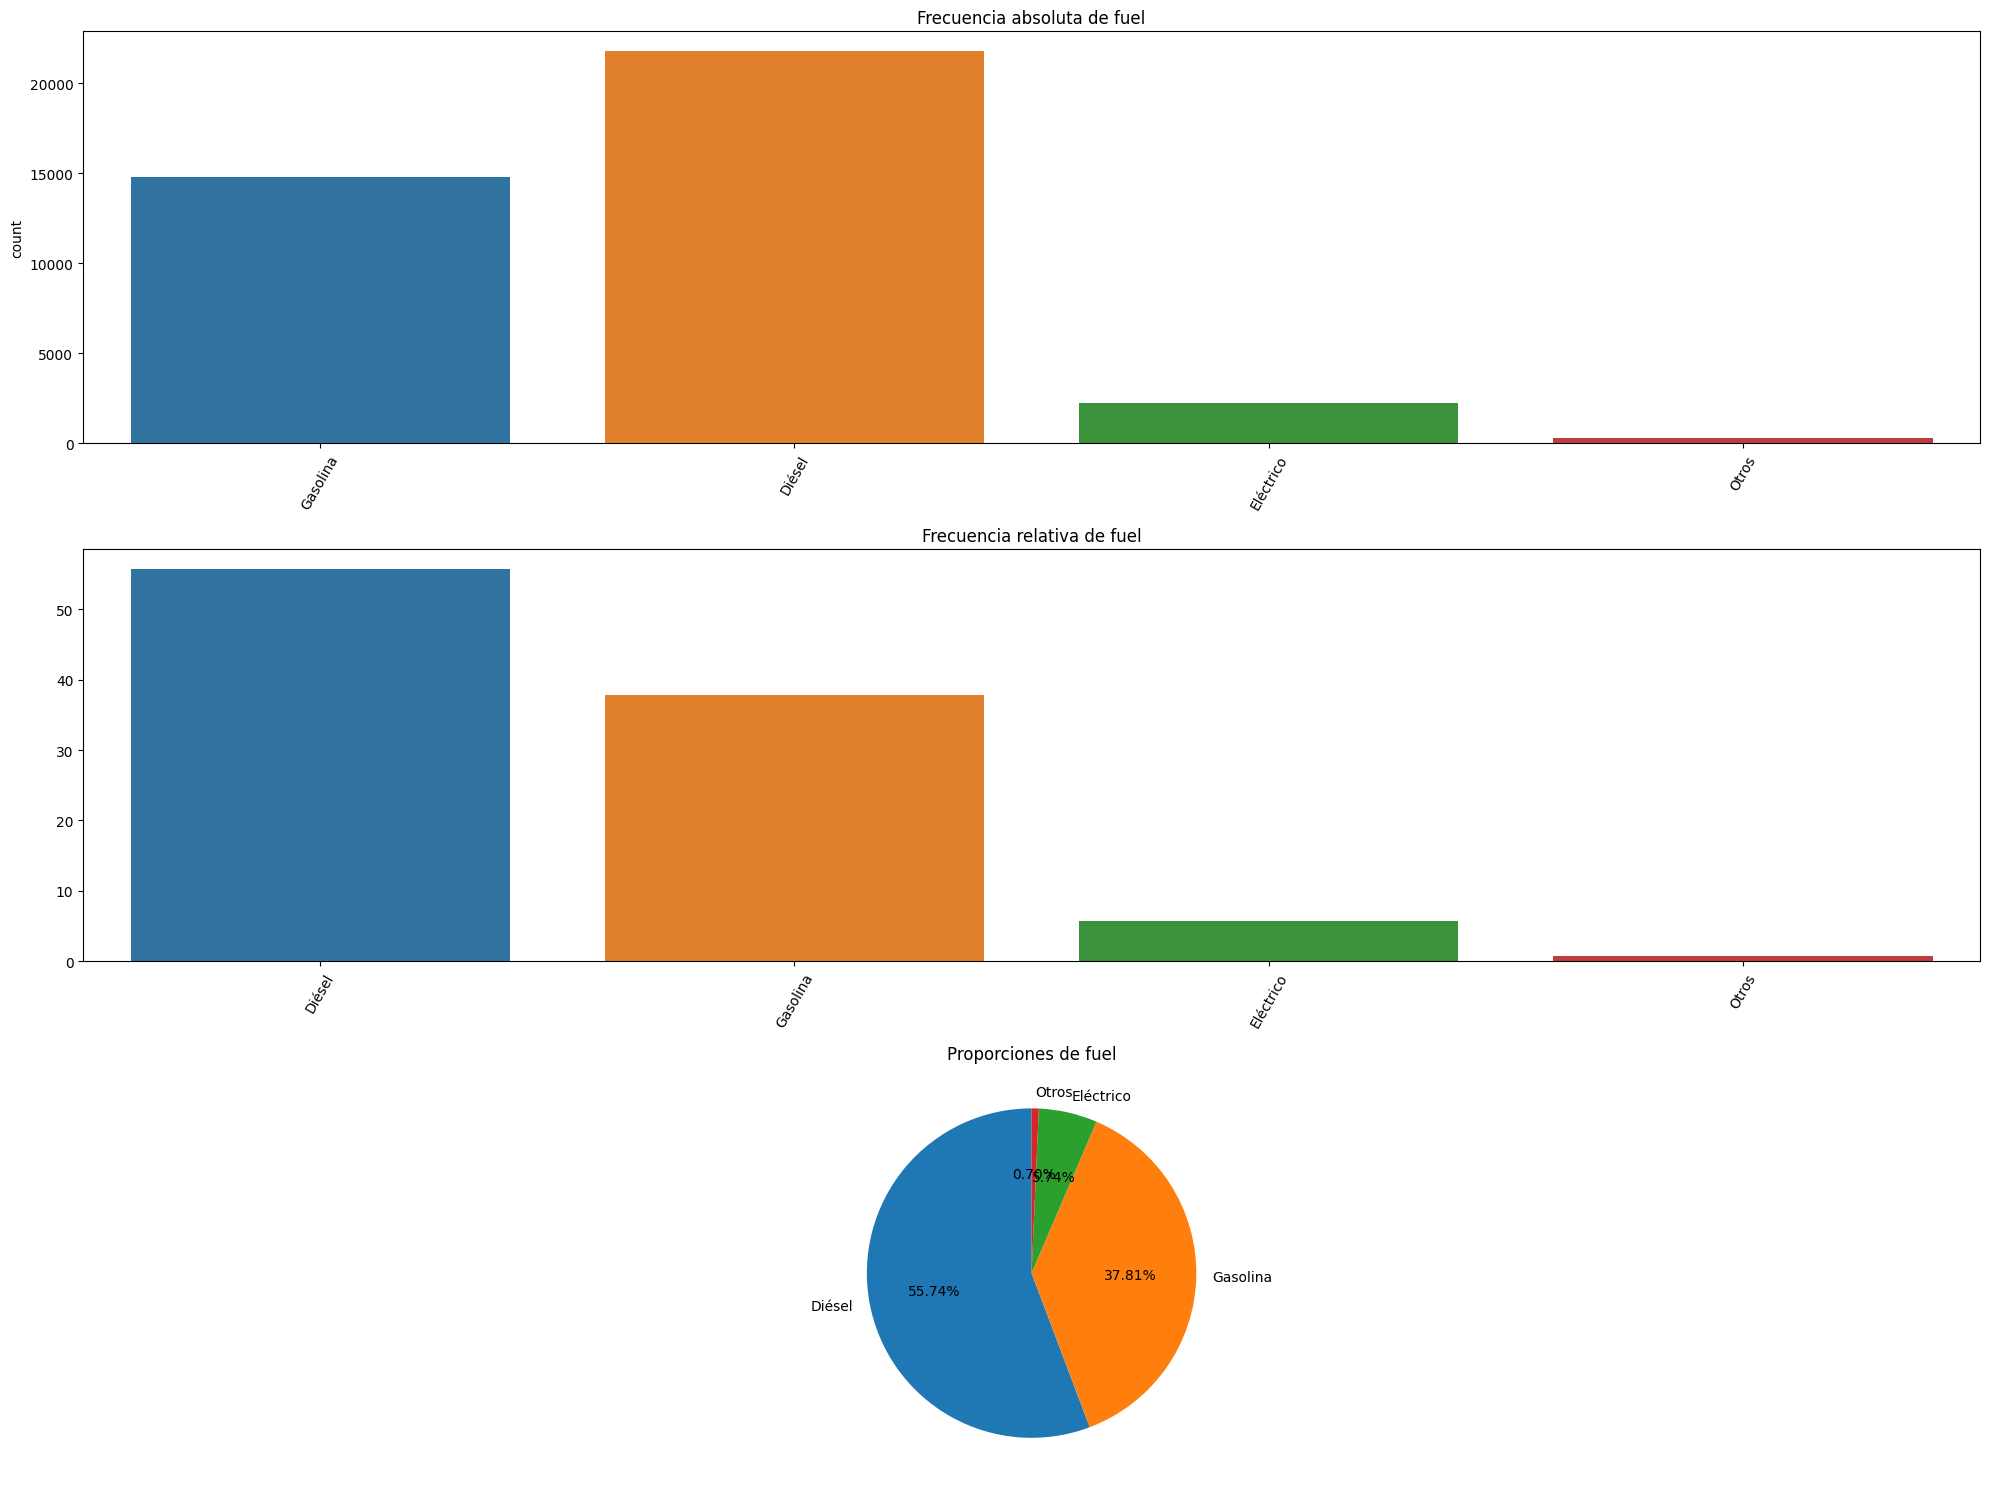

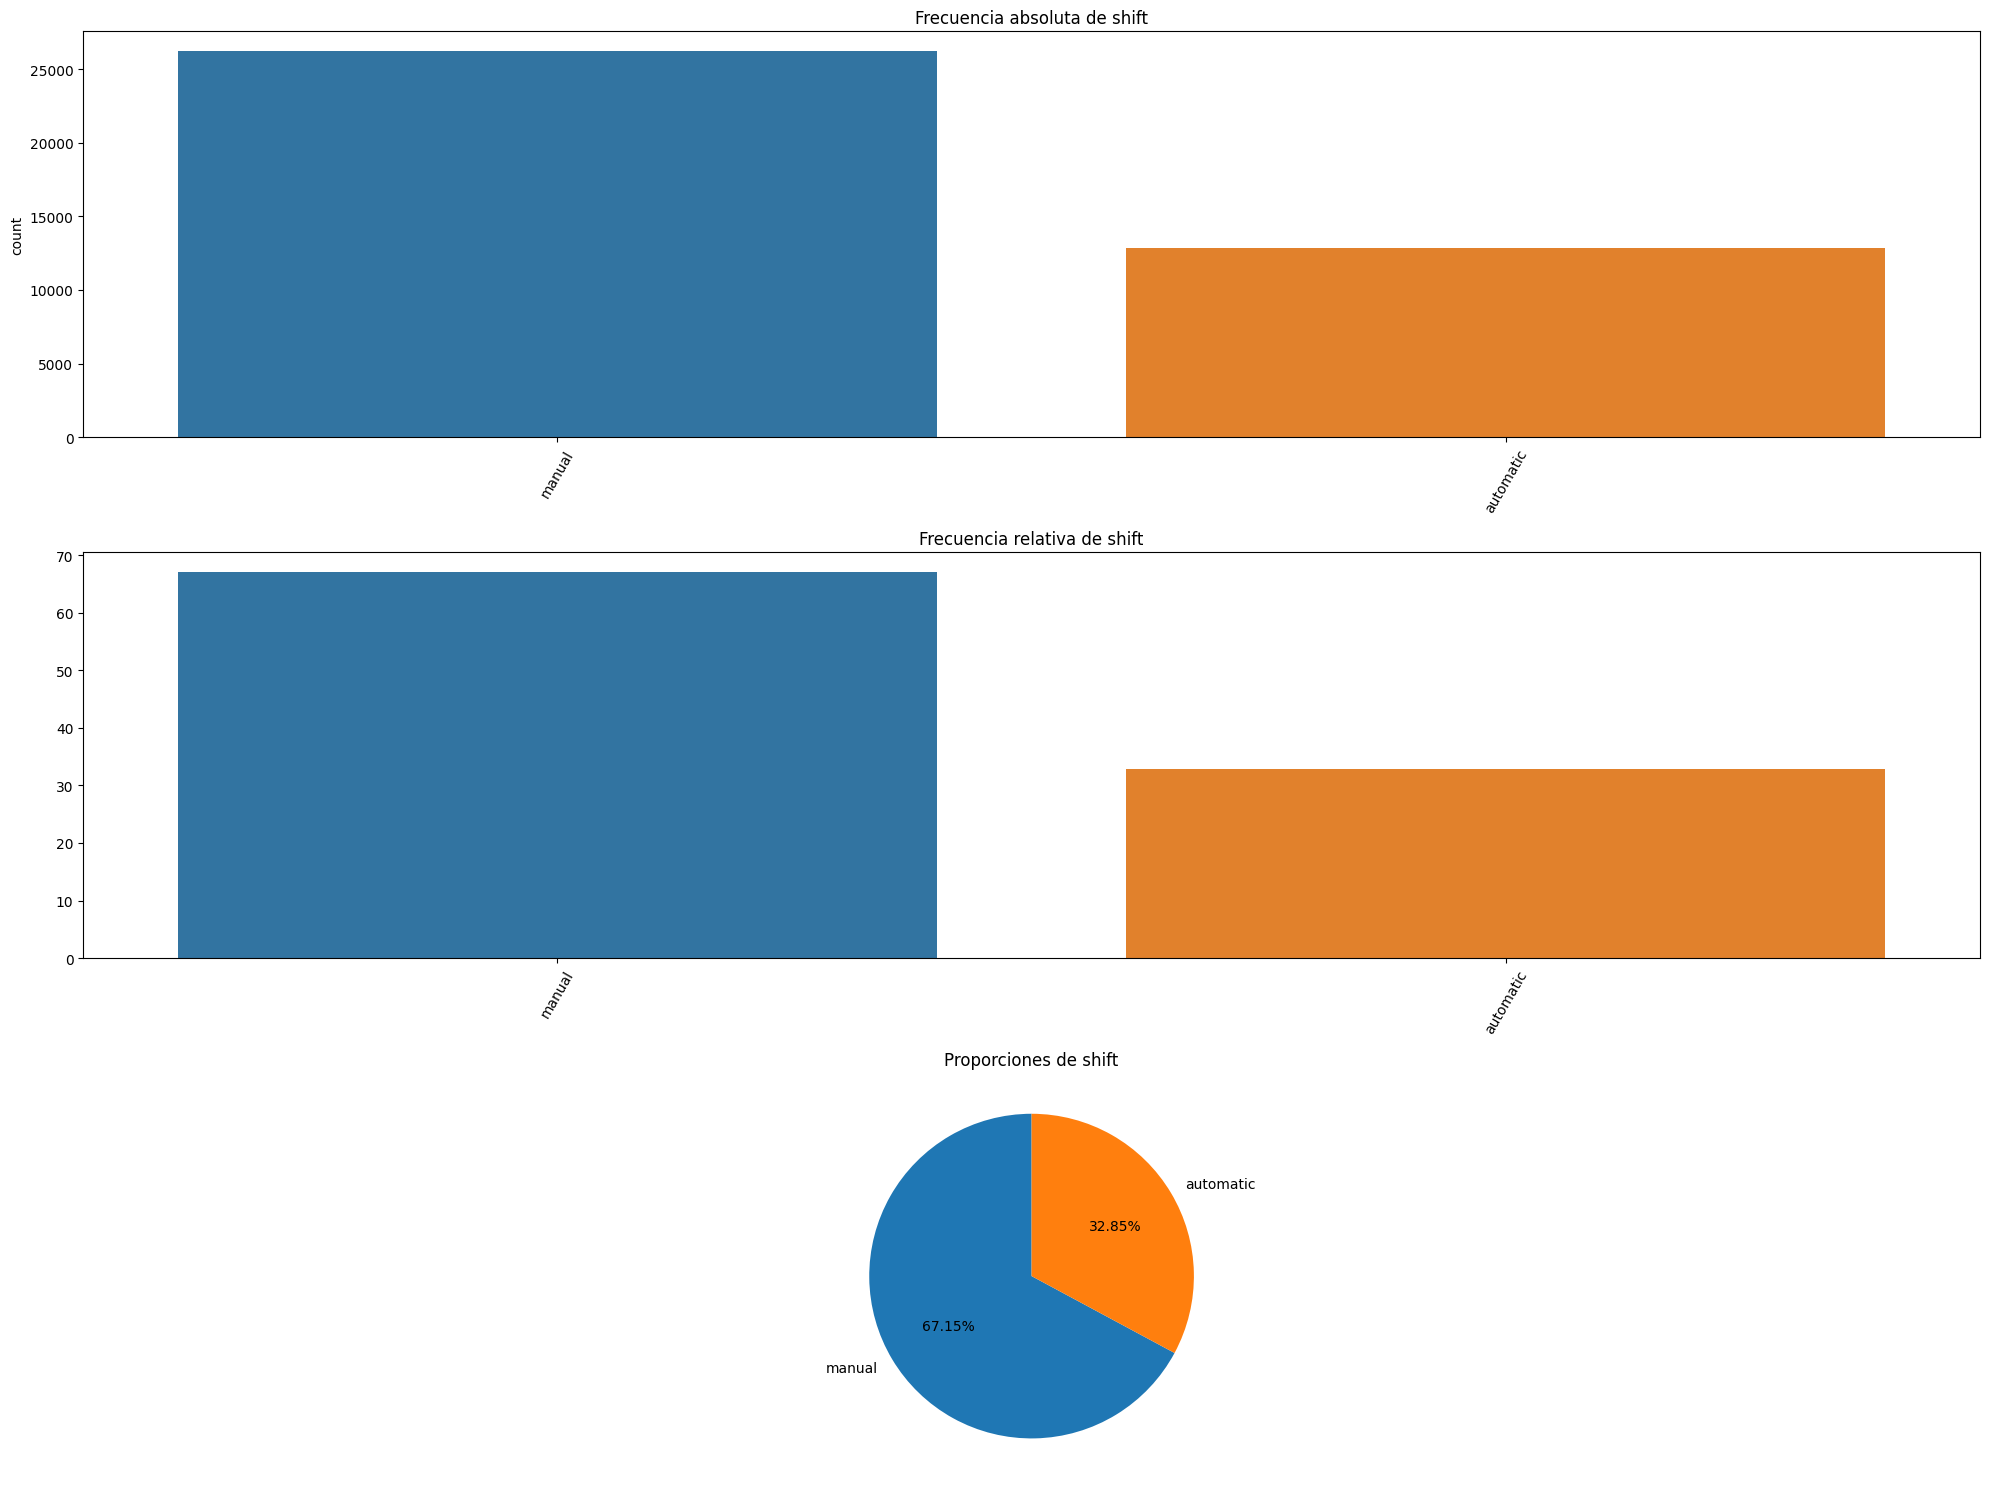

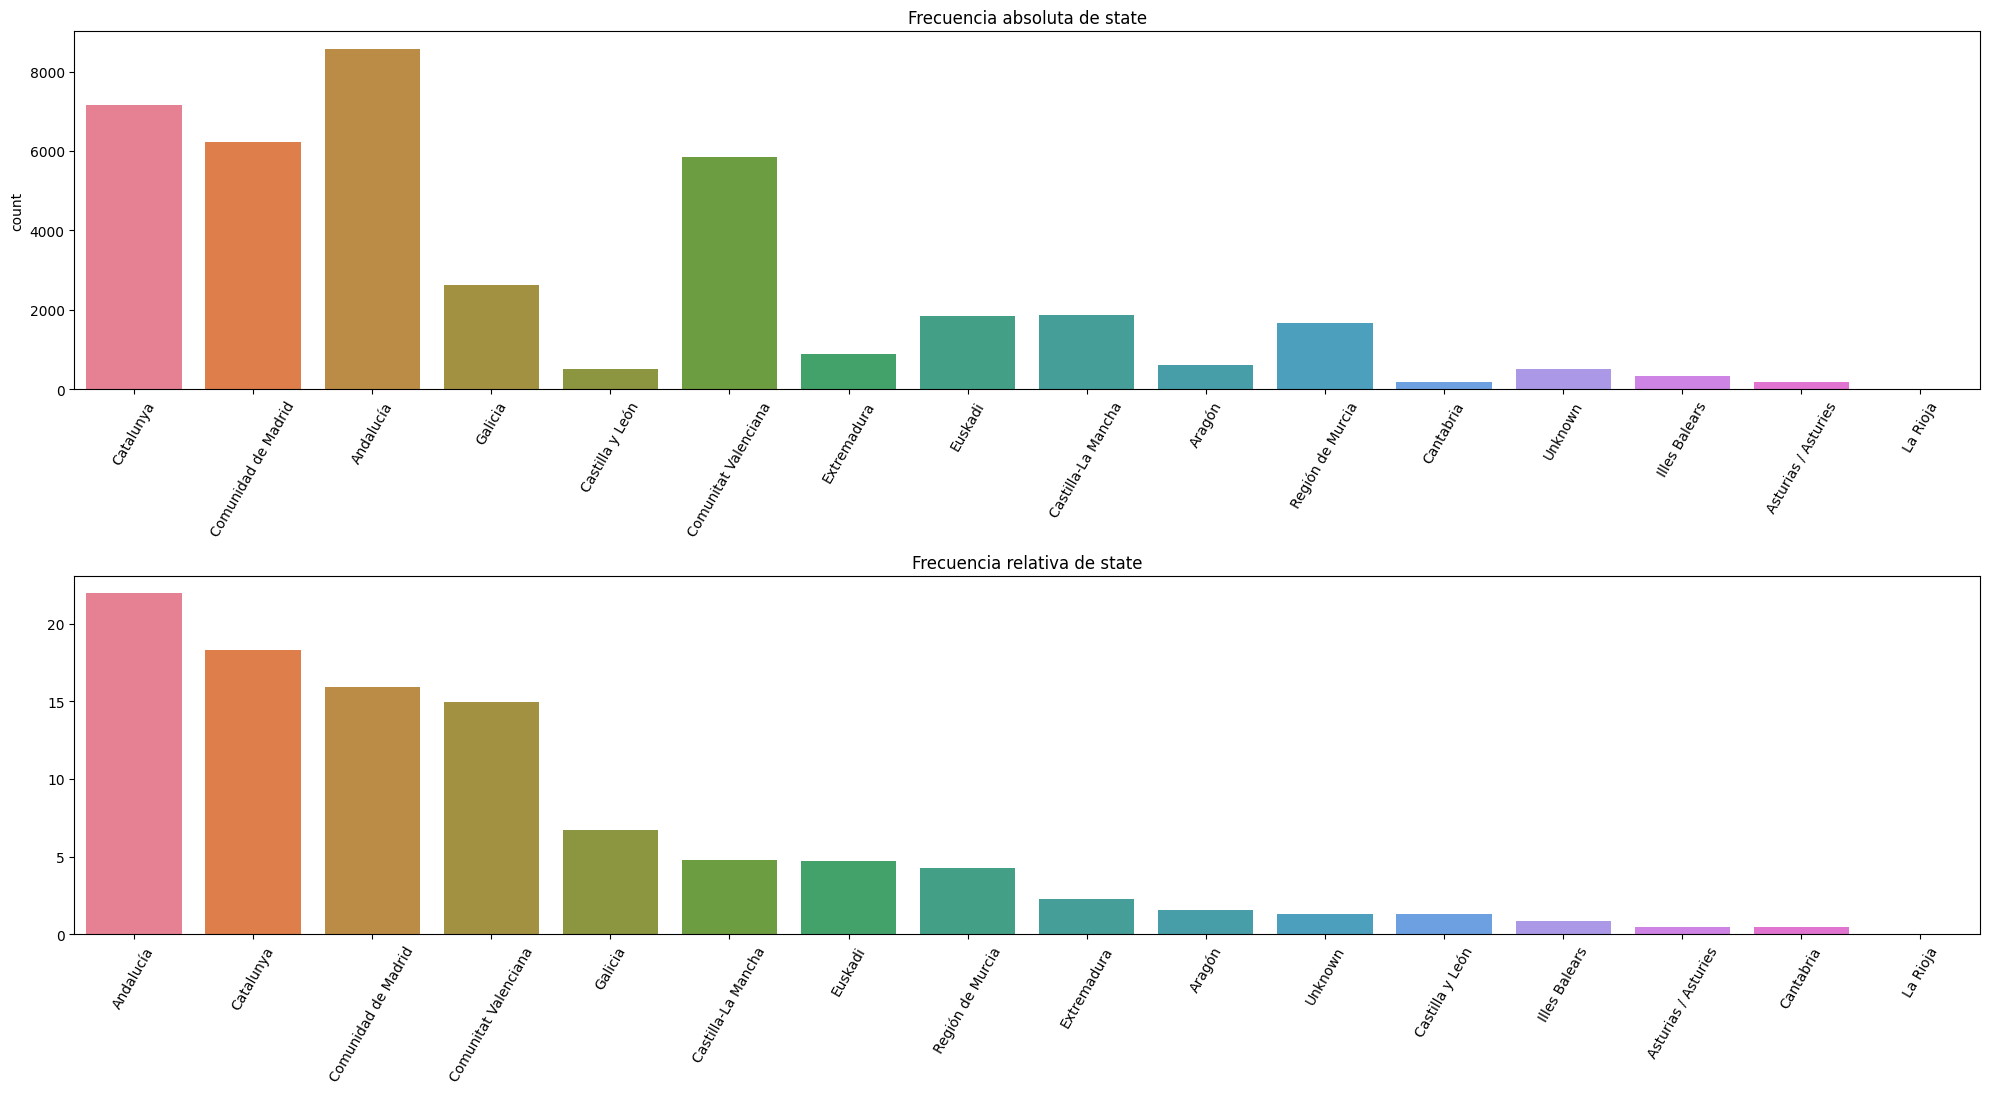

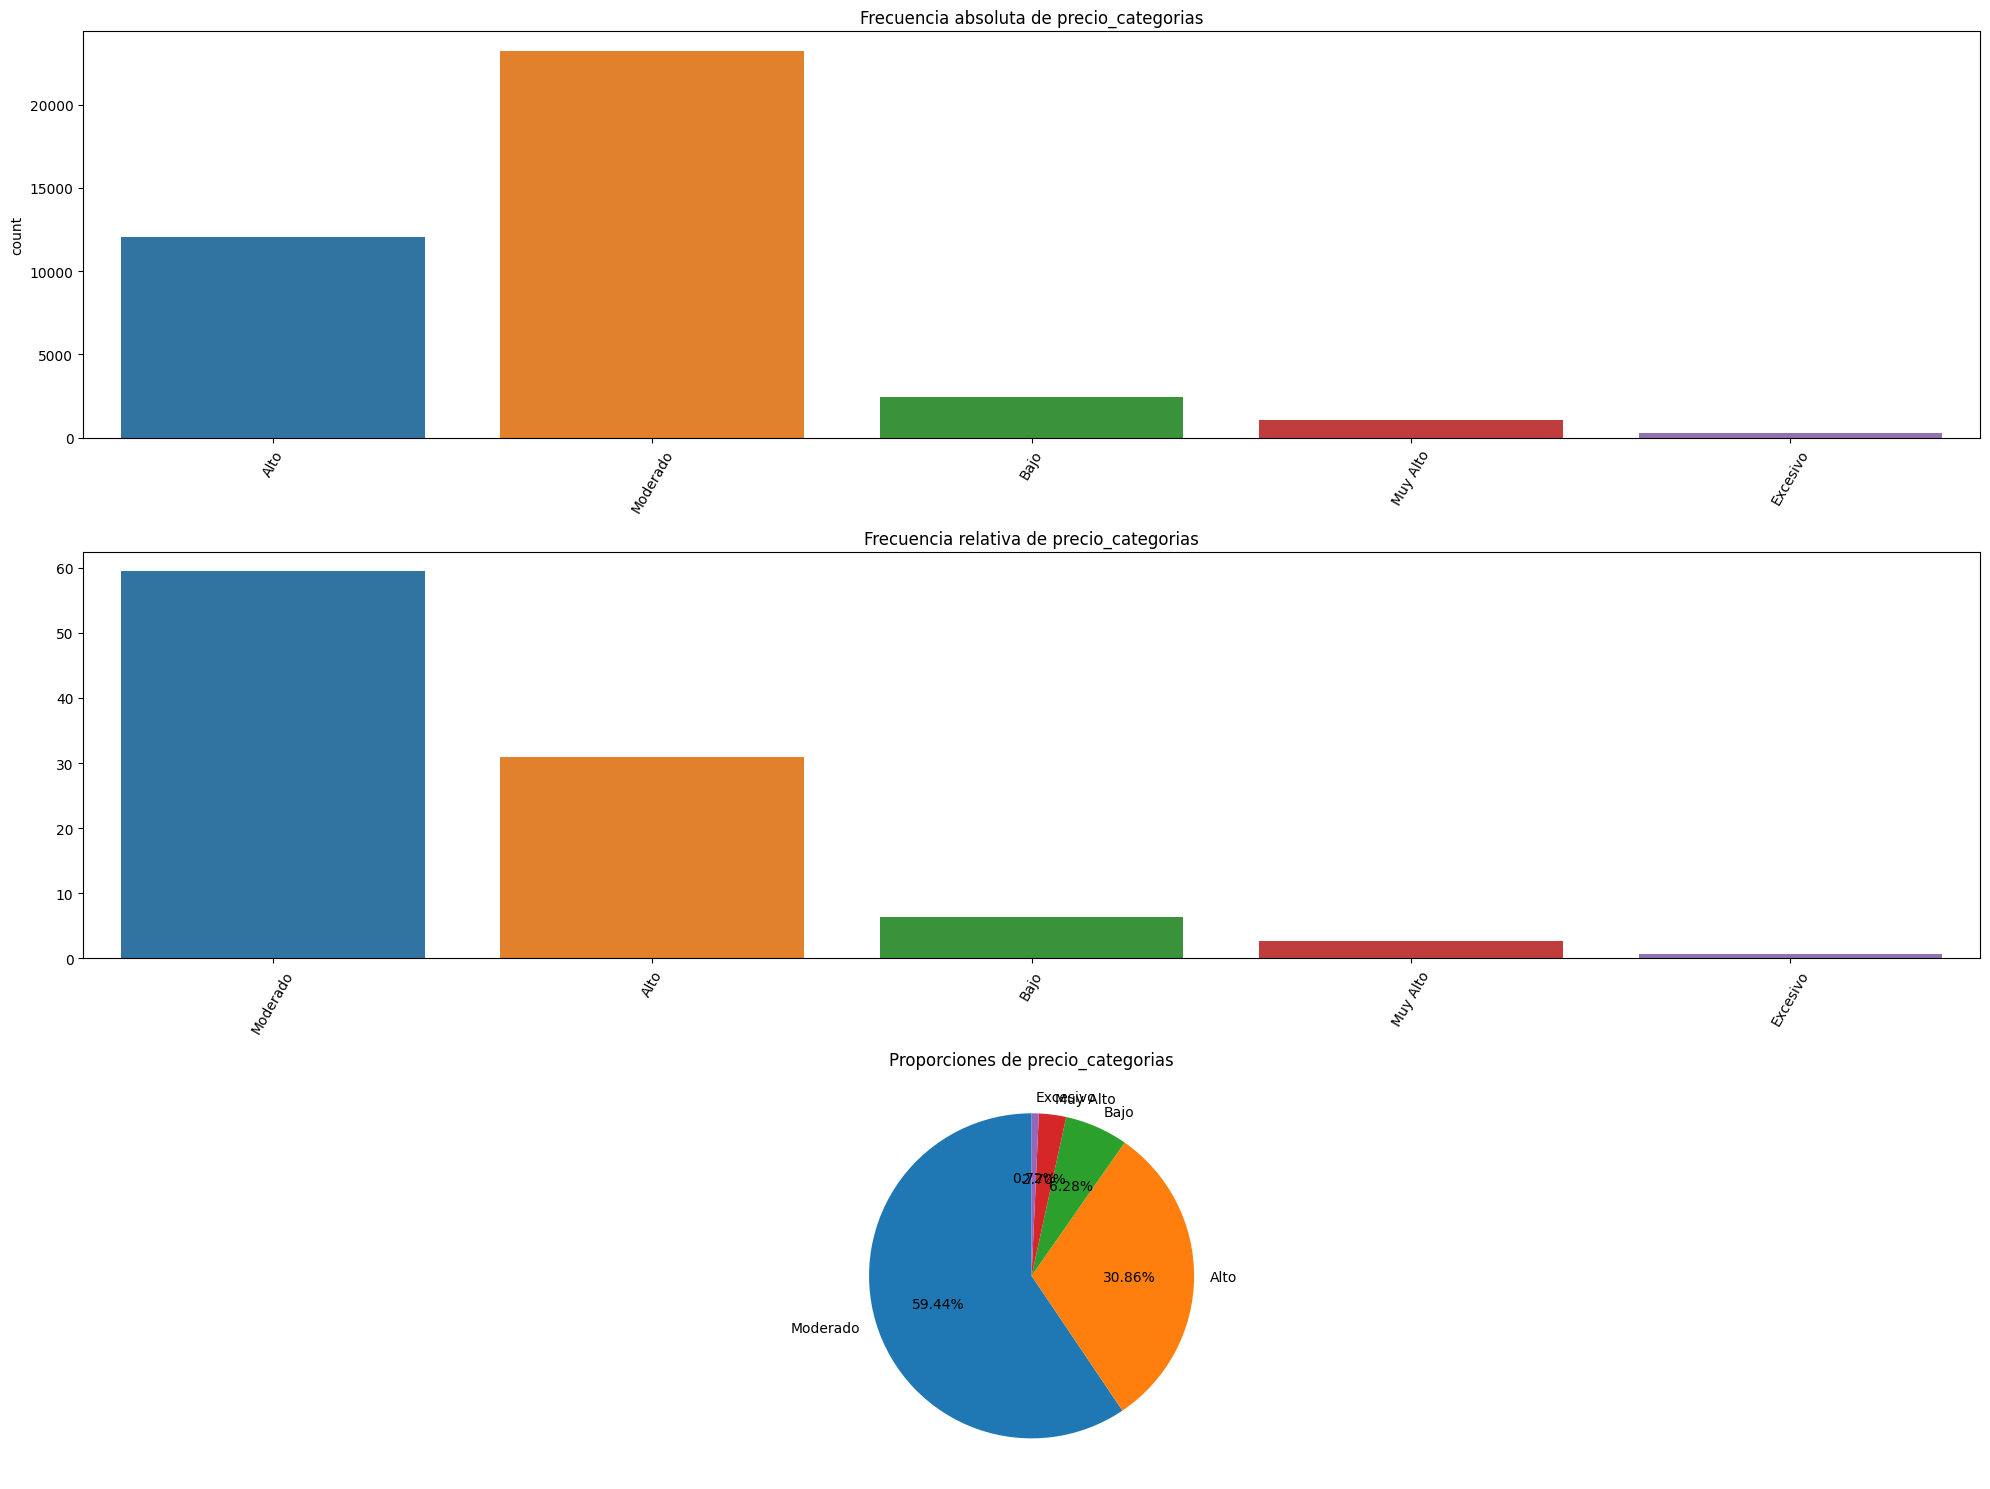

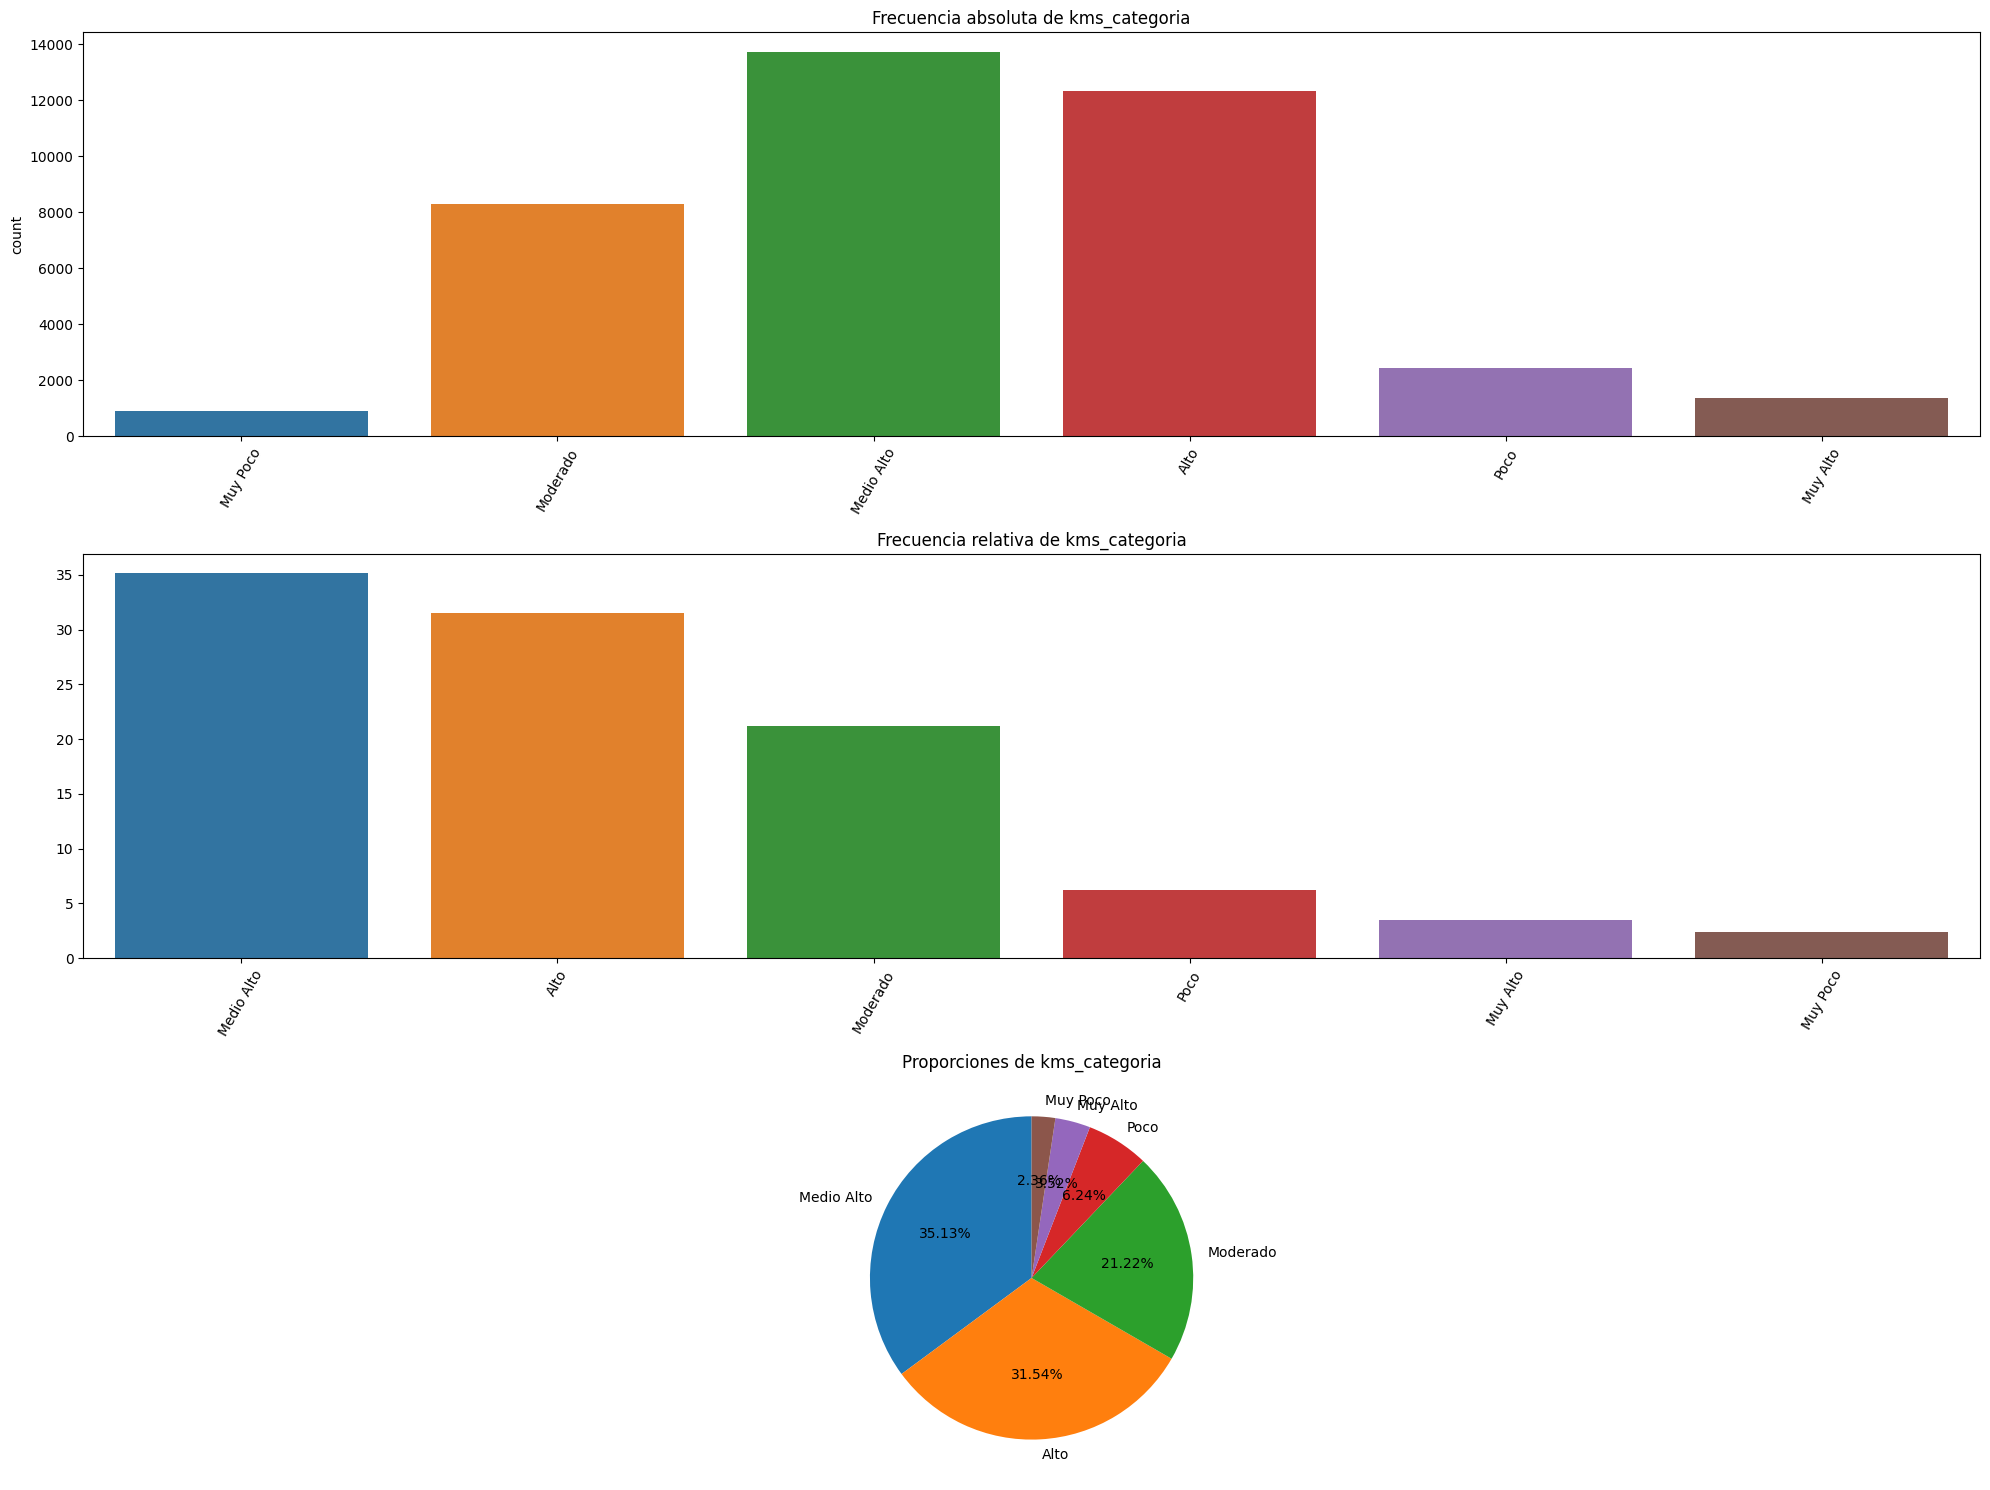

In [38]:
for columna in variables_categoricas:
    analisis_uni_categoricas(df_eda,columna)


Se observa que el tipo de combustible más común es el diésel (55.7 %), seguido de la gasolina (37.8 %), mientras que los coches eléctricos y otros tipos de combustible representan una proporción mínima.

En el siguiente gráfico, la mayoría de los coches tienen cambio manual (67.2 %), mientras que los automáticos suponen cerca de un tercio del total (32.8 %).

Respecto a las comunidades autónomas, vemos que Andalucía (22.5%) lidera el mercado seguida de Catalunya (17.5%), Comunidad de Madrid (16%) y Comunitat Valenciana (15%).

Los precios que más oscilan en la venta de coches son de las categorías: Moderado (cerca del 60%) y Alto (poco más de 30%)

Y por último , respecto al kilometraje de un coche nos encontramos más variedad teniendo como primer puesto a la categoría Medio-Alto (35%), seguido de Alto (31.5%) y con 3er puesto la categoría moderada (21.22%)


# Análisis univariante de variables numéricas

In [25]:
def boxplot_uni_numericas(df,var_numerica):
    fig,axs = plt.subplots(2,1,figsize=(20,15))
    
    sns.boxplot(x=var_numerica,data=df,ax=axs[0])
    axs[0].set_title(f"Diagrama de cajas de {var_numerica}")

    sns.histplot(df[var_numerica],kde=True,ax=axs[1])
    axs[1].set_title(f"Histograma y Func. de Densidad de {var_numerica}")

    fig.subplots_adjust(hspace=0.5)

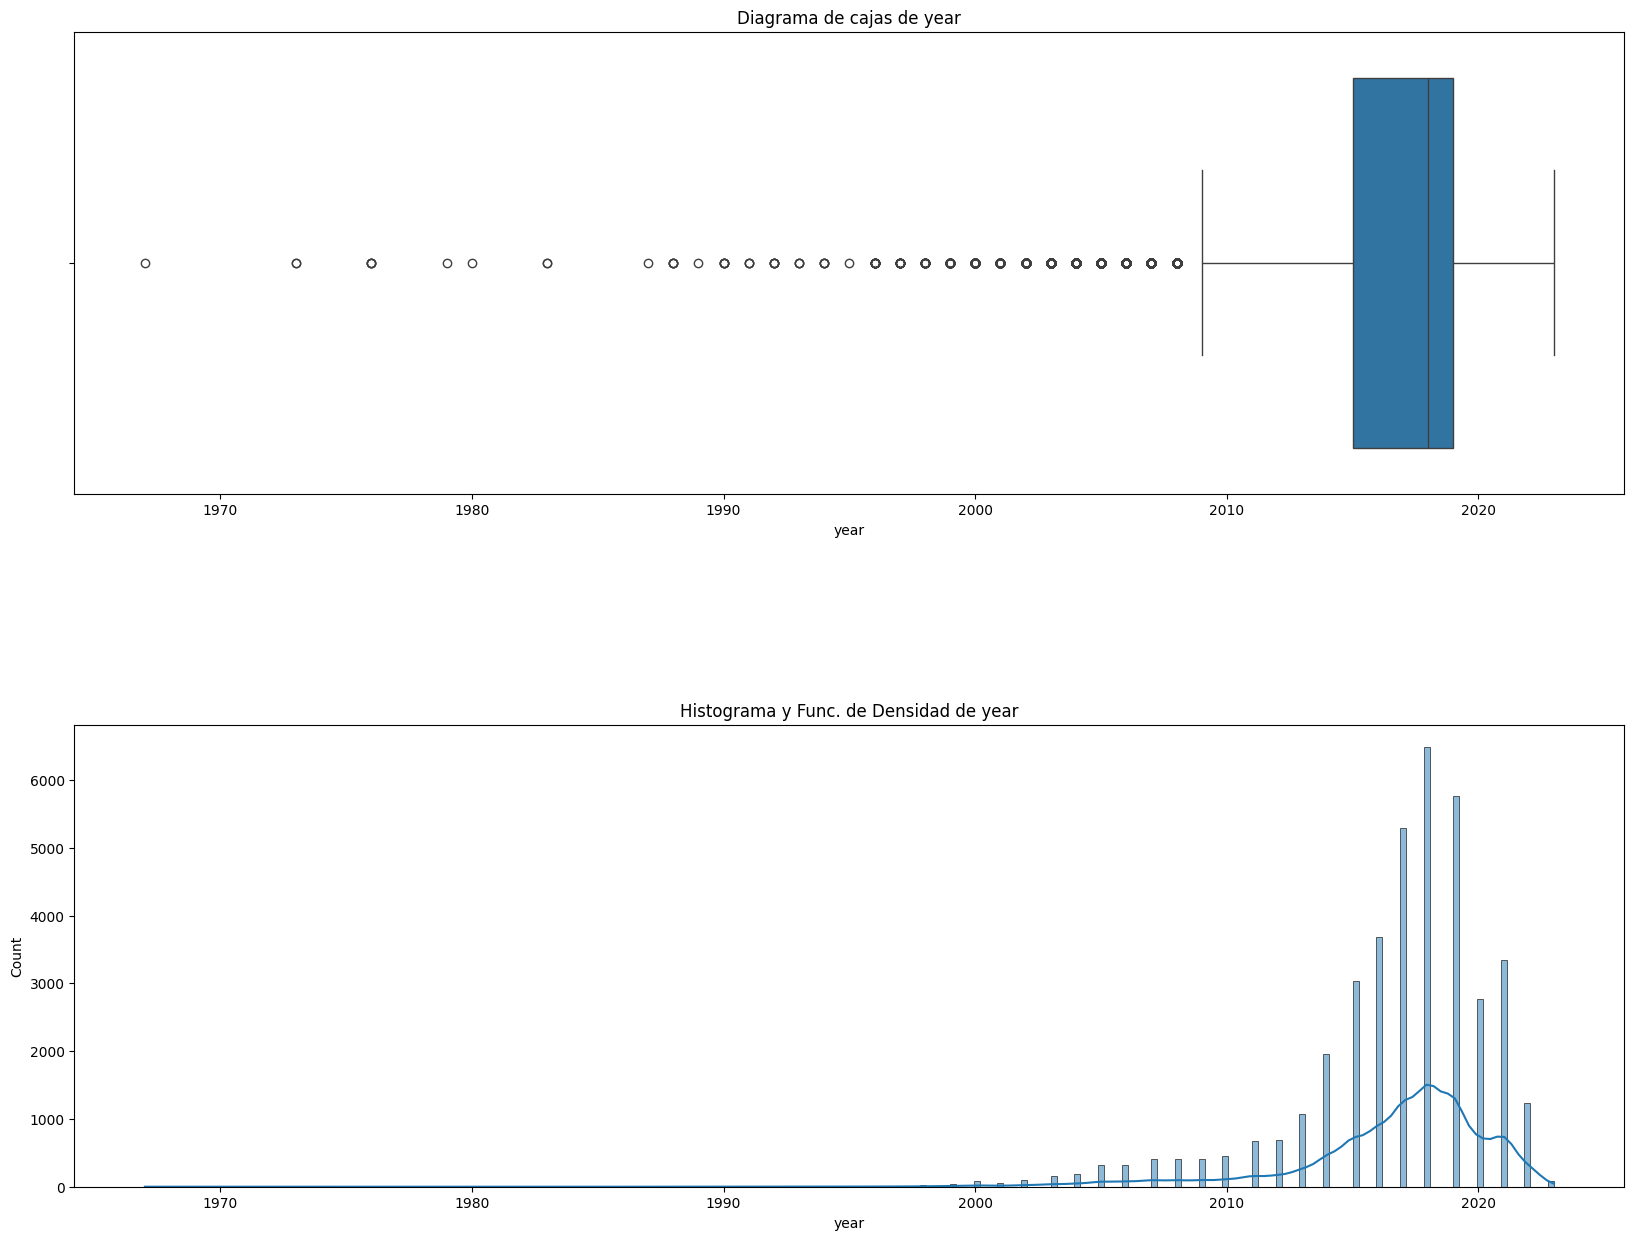

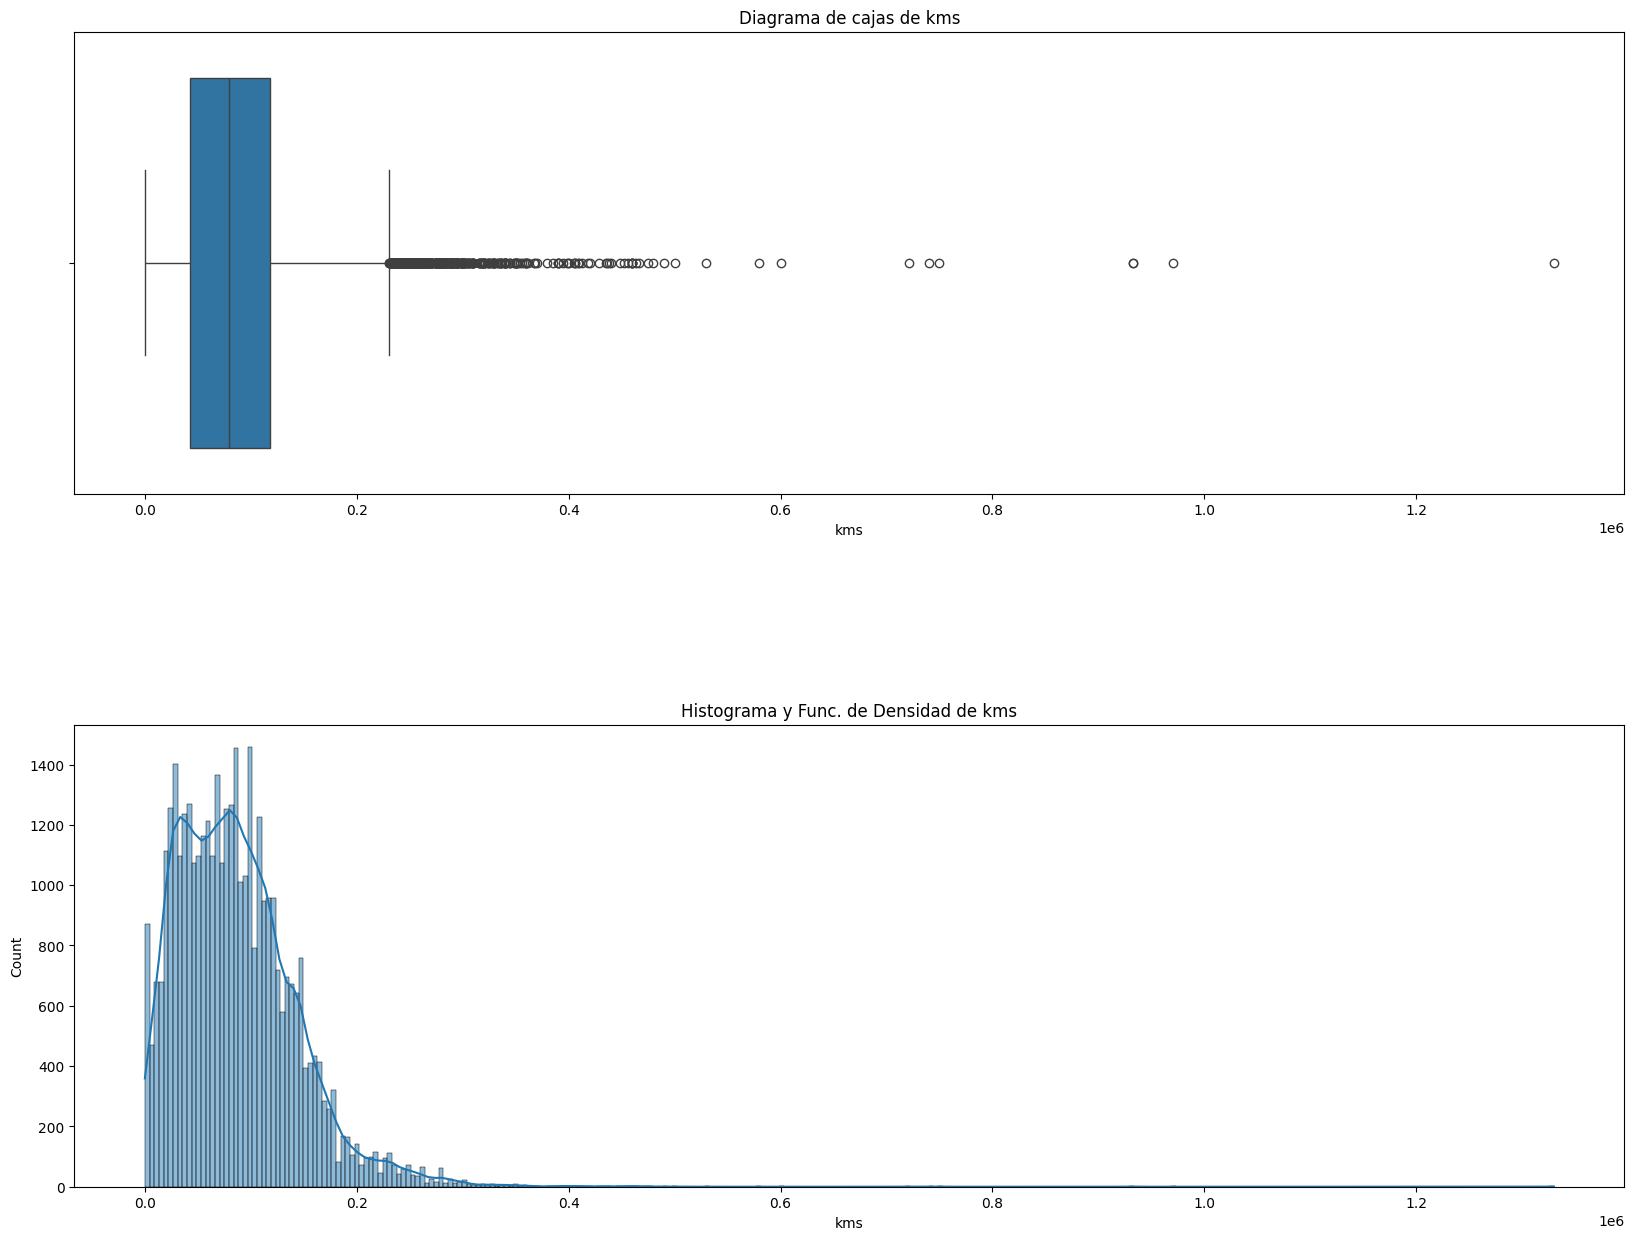

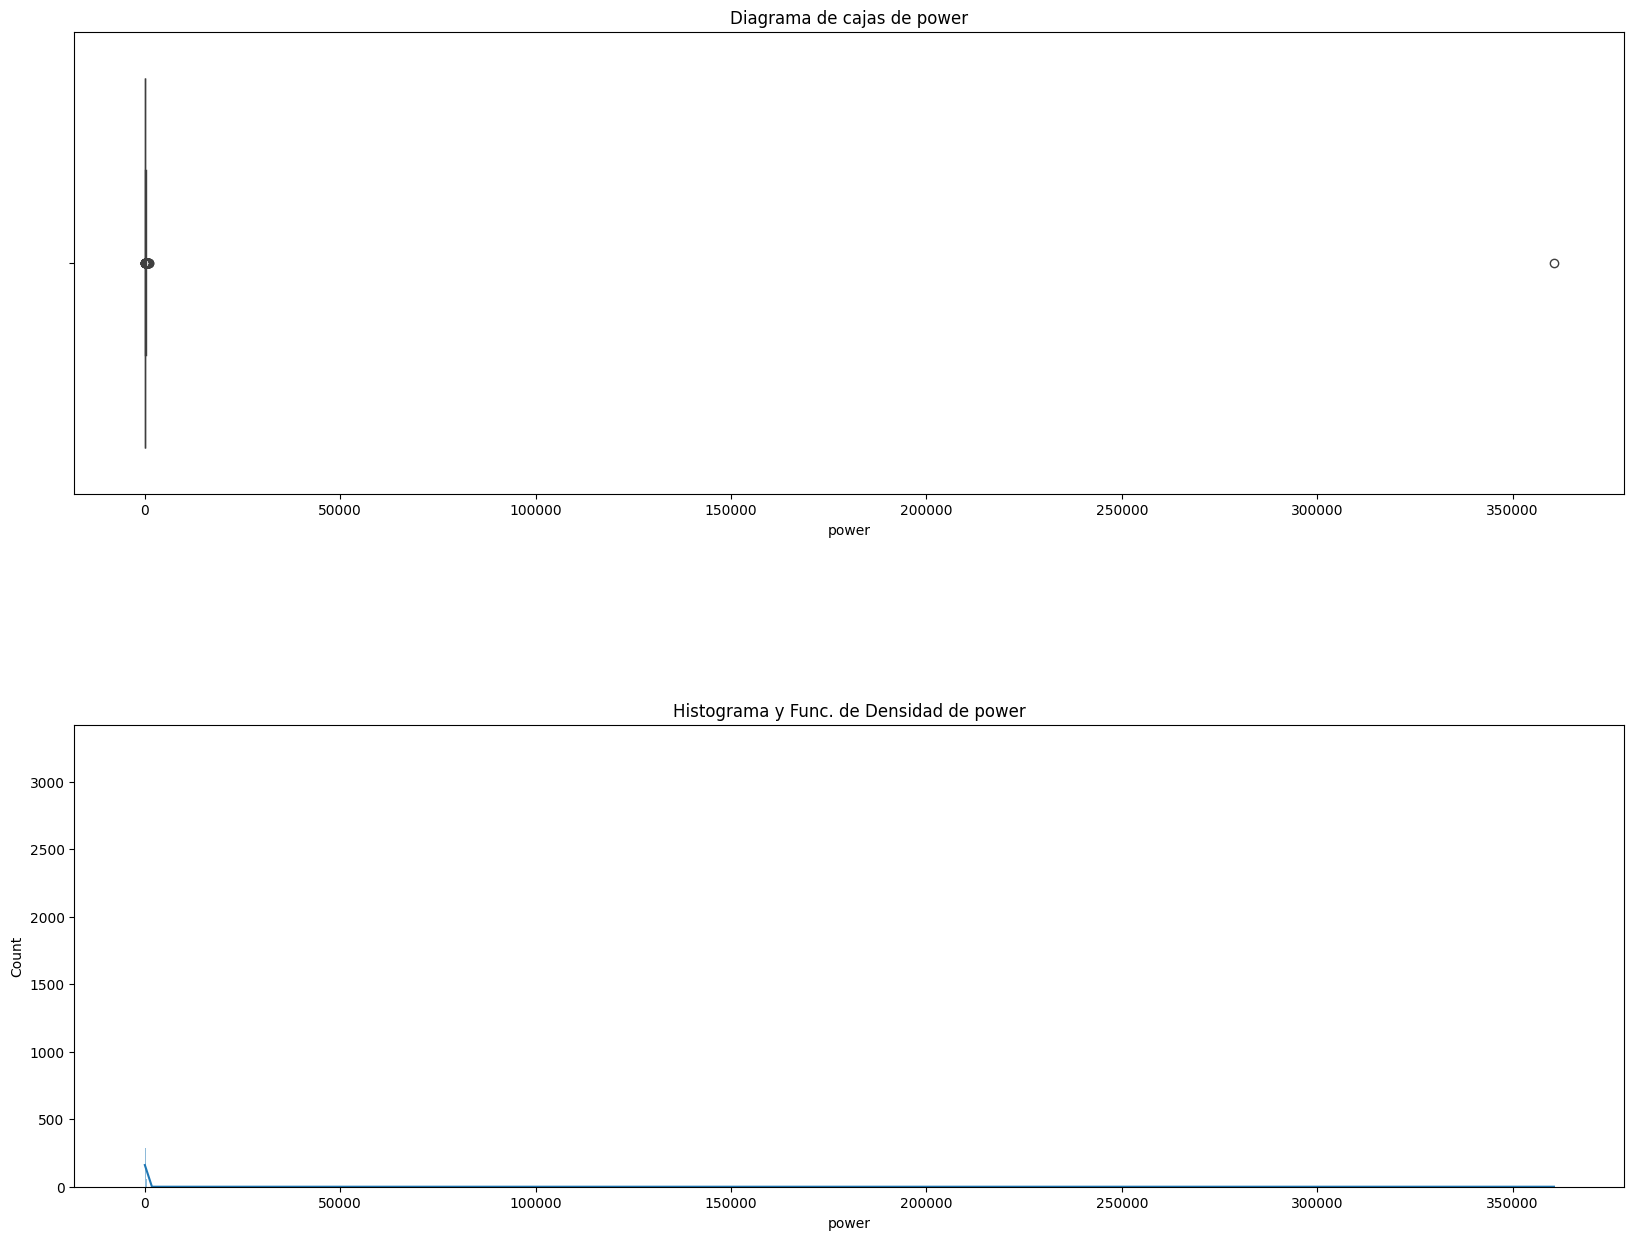

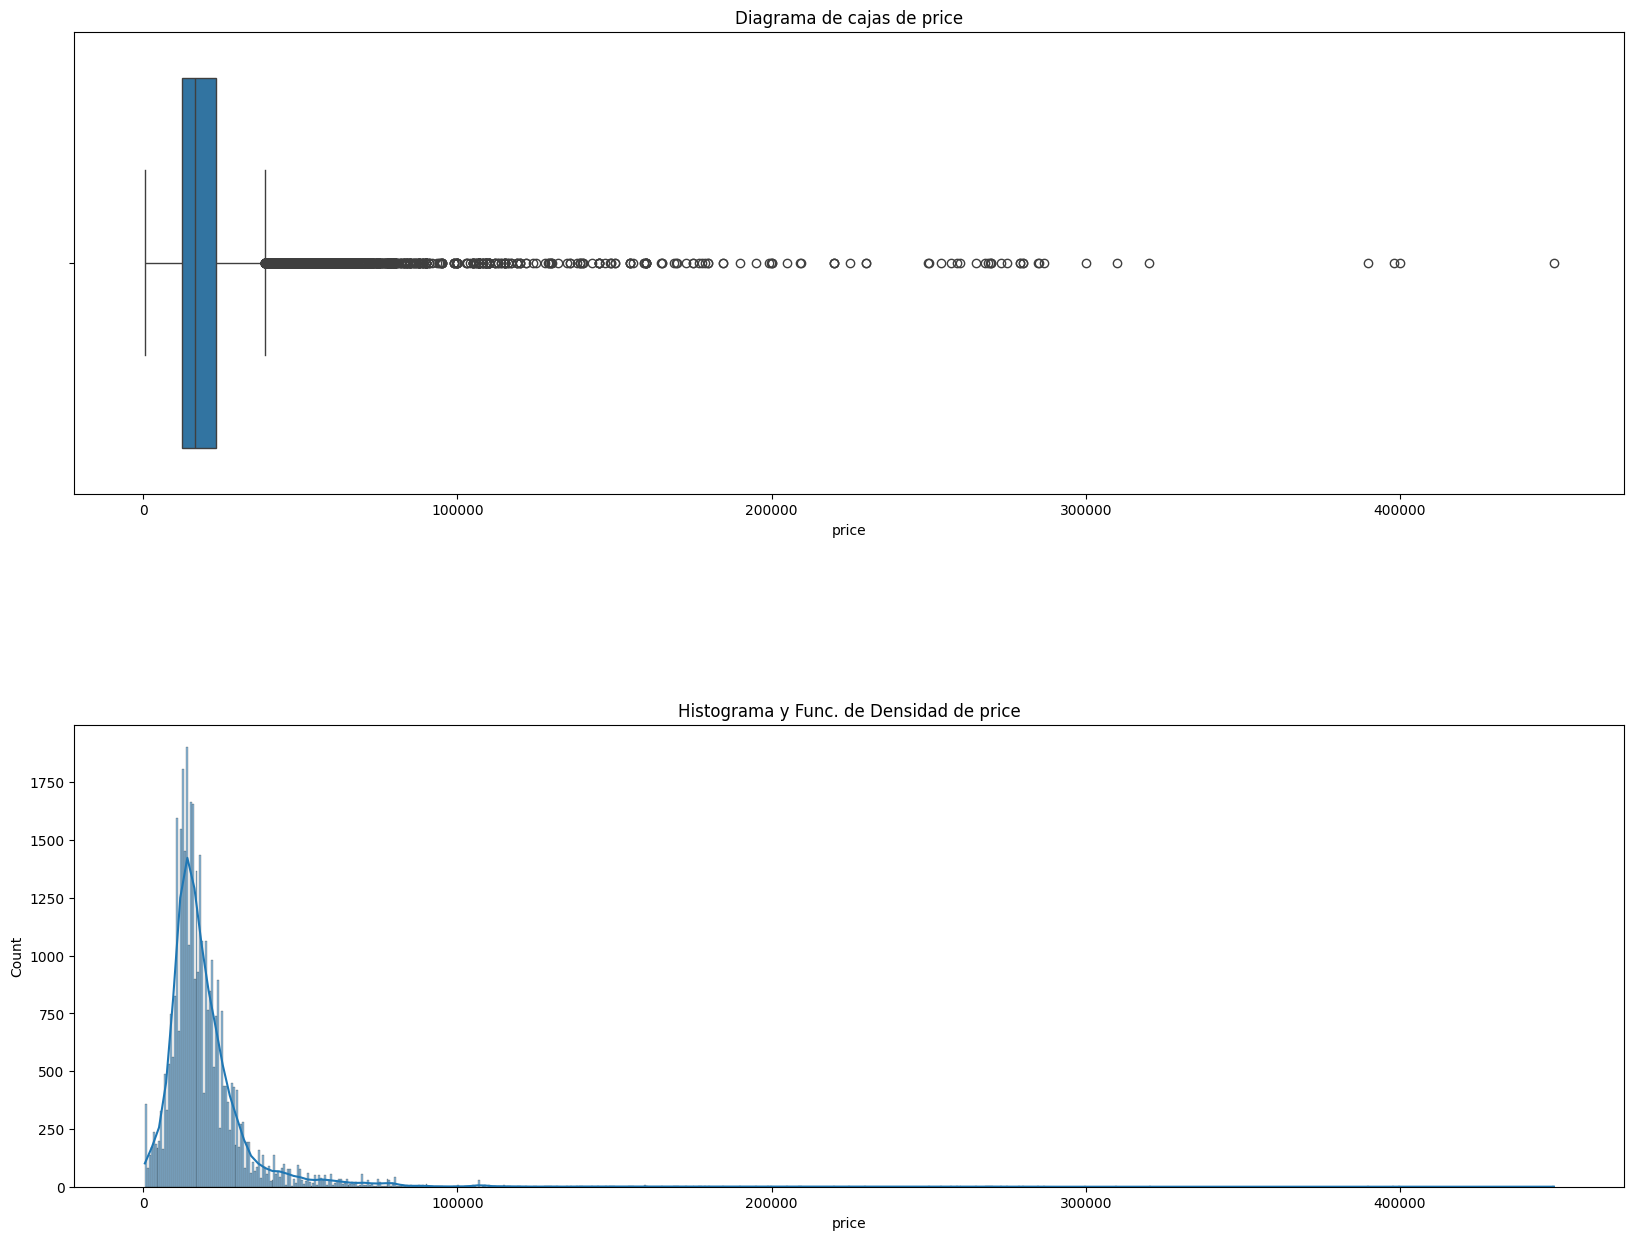

In [26]:
for columnas in variables_numericas:
    boxplot_uni_numericas(df_eda,columnas)

Análisis del Diagrama de Cajas y del histograma-FunciondeDensidad por columnas:

-"Year": Vemos que los coches se concentran entre el año 2011 y 2022 teniendo la mediana en 2018 y la media en 2016.

-"Kms": Los kms de los coches se concentran en el rango de 40000 a 120000. Teniendo la media en 86000 kms y la mediana en casi 80000

-"Power": Sobre la potencia de un coche no podemos analizar mucho con estos diagramas ya que el rango de las potencias de los coches normales es entre 60-160 cv. Los coches que tienen 300cv,400,500cv... son los deportivos o los exclusivos.

-"Price": El rango de concentración está más o menos entre 10000 y 30000 euros. Teniendo la mediana en 16500€ y la media en 18000€